In [1]:
import torch as t
from torch import nn
from torch.autograd import Variable


In [2]:
#我做了那么多工作，好像只需把nn.Conv2d的groups参数设为3就可以了。
class gaussion_kernel(nn.Module):
    def __init__(self,inchannel=1,outchannel=1,stride=1):
        super().__init__()
        self.gaus_conv1 = nn.Conv2d(inchannel,outchannel,3,stride,padding=1,dilation=1,bias=False)    #这个padding可以保证前后图片大小相等。
        self.gaus_conv1.weight.data = (t.ones(3,3)/9.).view(1,1,3,3)
        
        
    def forward(self,x):
        print(x[:,0,:,:].shape)             #这个维数不够，所以下面要加上unsqueeze(1)
        x1 = self.gaus_conv1(x[:,0,:,:].unsqueeze(1))    #参考P144
        x2 = self.gaus_conv1(x[:,1,:,:].unsqueeze(1))
        x3 = self.gaus_conv1(x[:,2,:,:].unsqueeze(1))
        x = t.cat((x1,x2,x3),1)
        print(x.shape)
        
        return x

In [3]:
class gaussion_kernel1(nn.Module):
    def __init__(self,inchannel=3,outchannel=3,stride=1):
        super().__init__()
        self.gaus_conv1 = nn.Conv2d(inchannel,outchannel,3,stride,padding=1,groups=3,dilation=1,bias=False)   #每次处理后的图片显示的都不一样，最终原因就是没加bias=False
        
        self.gaus_conv1.weight.data = (t.ones(3,3,3)/9.).view(3,1,3,3)
        
    def forward(self,x):
        print(self.gaus_conv1.weight.shape)
        x = self.gaus_conv1(x)
        
        return x

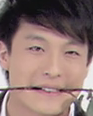

In [4]:
#P108
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
to_tensor = ToTensor()                #查了资料，ToTensor会将0-255自动转为0-1
to_pil = ToPILImage()
shimei = Image.open("C:\\Users\\SiChen\\Desktop\\picture_15154_.png")
shimei

In [17]:
layer = gaussion_kernel()      
#layer = gaussion_kernel1()

torch.Size([1, 3, 116, 93])
torch.Size([1, 3, 116, 93])
torch.Size([1, 116, 93])
torch.Size([1, 3, 116, 93])
torch.Size([1, 116, 93])
torch.Size([1, 3, 116, 93])
torch.Size([1, 116, 93])
torch.Size([1, 3, 116, 93])
torch.Size([1, 116, 93])
torch.Size([1, 3, 116, 93])
torch.Size([1, 116, 93])
torch.Size([1, 3, 116, 93])
torch.Size([1, 116, 93])
torch.Size([1, 3, 116, 93])


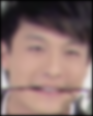

In [18]:
input1  = to_tensor(shimei).unsqueeze(0)              #.view(1,3,4032,3024)   
print(input1.shape)
#print(input1[0,0,1,:])
input1 = Variable(input1)                 #必须有这一行，不然就dim=3,而不是4
#print(input1[0,0,1,:])
print(input1.shape)
output1 = layer(input1)
#print(output1[0,0,1,:])
output1 = layer(output1)
output1 = layer(output1)

#print(output1[0,0,1,:])
output1 = layer(output1)
output1 = layer(output1)
output1 = layer(output1)
'''
output1 = layer(output1)
output1 = layer(output1)
output1 = layer(output1)
output1 = layer(output1)
output1 = layer(output1)
'''
to_pil(output1.data.squeeze(0))
#t.show

In [51]:

t.ones(3,3)/9.
print(shimei)   #可以看到，格式为RGB

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=93x116 at 0x5A4EB6E710>
